# Homework
### Instructions

Please solve all 3 problems below, but submit EITHER problems 1 and 2, OR problem 3.

When submitting a python solution, please make sure to submit BOTH the source code (.py or .ipy file) and a pdf of the code together with the expected output.


### 1) Sliding a hockey puck on a slope - $\mu=?$, $\alpha=$, $v_0$?

I can slide a flat piece of metal weighing 800 g with a well controlled but initial speed of 10 km/h. When I slide it downwards, it comes to a full stop after 81 cm. When I slide it upwards, it comes to a full stop after 21 cm. What is the coefficient of friction $\mu$ and the angle $\alpha$? (6p)


### 2) Mass on spring - how much to compress?

A steel spring, which can push or pull, is lying on the ground, near a vertical wall, perpendicular to the wall. One end is fixed to the wall, on the free end a mass is attached that can slide on the ground, with friction. If I pull the mass away from the wall, because of static friction, it can still be in equilibrium, even if it is nudged ever so slightly - as long as the spring is stretched by no more than 10 cm. If the spring is stretched by more than that, even if the mass is in equilibrium to start with (due to static friction), if it is nudged, it will be pulled towards the wall, and eventually stop because the friction forces dissipate the energy. How far do I need to pull it from the wall, so that it comes to a stop exactly at the position where the spring is unstretched? (4p)

+ extra work (not needed for 100 percent of points):


### 3) How far does a plastic ball sink?

I drop a plastic ball (radius R=1 cm) into water, it enters the water with 4 km/h. The ball has the same density as water. Since I dropped it, it sinks down, but under the effect of viscous friction, it is slowed down. The force is well approximated by Stokes' law,  

$$ F_\mathrm{drag} = - 6\pi \eta R  v, $$

with dynamic viscosity of water $\eta = 10^{-3}$ Ns/m$^2$.

How deep will the ball sink before it stops?

This problem is hard to solve analytically. Try to solve it numerically, calculating the x(t) and v(t) curves using Newton's 2nd law, for "long enough" time. The only force you need to take into account is the viscous friction force, since under water, the gravitational pull of the Earth and the buoyancy force cancel each other out. Since as the ball slows down, the friction force decreases, the ball never truly "stops" - but still, there is a depth which it would only reach in the $t\to\infty$ limit.

Plot the x(t) and v(t) curves. Also plot the v(x) curve. This last curve can be used for an accurate estimate of how deep the ball sinks.



In [2]:
%pylab inline
v0 = 5/3.6
g = 9.81
mu = 0.3
alpha = 10*pi/180
print(v0**2/2/g /(cos(alpha)*mu-sin(alpha)))
print(v0**2/2/g /(cos(alpha)*mu+sin(alpha)))


Populating the interactive namespace from numpy and matplotlib
0.8072528399464166
0.20959424952025482


# Exercises to be solved in class:


## Does the normal force do work on a body? (3 min, test)
Take a body sliding down an incline with a complicated shape. Does the normal force do work on the body?

*   A - only on segments that are slanted downwards
*   B - only on segments that are slanted upwards
*   C - Yes, on all segments
*   D - No


## Kicked simple pendulum (5 min)

We hit a simple pendulum in equilibrium, a 1 kg steel ball hanging on a 40cm rope, with a baseball bat horizontally. The ball starts moving with 10 km/h. Neglecting air resistance, how high will it swing? (39.3 cm)

## Jumping with a parachute (5 min)
A parachutist is dropped from a plane at an altitude of 2000 m; the plane is flying horizontally, with a speed of 500 km/h.  The parachutist reaches the ground with a vertical velocity of 15 km/h. Her mass (together with the parachute), is 100 kg. How much work has the drag force performed on her?


## How much power to accelerate a car? (13 min)

A small car of mass m=1200 kg is accelerated from standstill to 60 km/h under 9 seconds.

What is the average power put out by the motor?

Neglecting the effect of drag, at least how large is the coefficient of static friction between the car's tyre and the ground?


## Power of accelerating elevator (14 min)

An elevator of mass m=1000 kg starts going up, in the first 4 seconds of motion with a uniform acceleration of a=1.2 m/$s^2$. What is

a) the average power the motor outputs,

b) the power at t=1s,

c) the power at t=4s?





# Write a python code useful for homework 3. - Solve numerically, plot numerically

Consider now a ramp segment that is connected to the bottom of the ramp before, which serves to shoot the toy car up in the air. The ramp segment has a circular arc shape, with radius of curvature $R$, and ends in a part that is angled up at angle $\alpha$, i.e., the arc has a central angle of $2\alpha$. Neglecting friction, the car leaves the ramp with velocity $v_1=v_0$ (energy conservation). If the coefficient of friction between car and ramp is $\mu$, what is the velocity of the car, $v_1$, when it leaves the ramp?

![picture](https://drive.google.com/uc?id=17NuvPxK9uVS_nNcP58v89zNdqgyI5F25)

a) Draw a free body diagram of the forces on the toy car. How large is the normal force?

b) Taking $R=5\rm\, cm$, $\alpha=45^\circ$, $\mu=0.02$, and $v_0=10\rm\,km/h$, write a code that calculates the (i) car's position along the ramp, $s$, and (ii) its tangential velocity, $v$. Note that we can connect the variable $s=0...2R\alpha$ with the local descent angle of the ramp, $\theta=+\alpha...-\alpha$ via $s=(\alpha-\theta)R$. Plot the $s(t)$, $v(t)$ curves, as well as the curves of the potential and kinetic energy on the ramp. This calculates $v_1$ as well. Calculate numerically the work done by friction. Check that it is equal to the difference in the kinetic energy of the car at the initial and final positions.

c) Plot $v_1$ as a function of $v_0$ for $\mu=0.02$, $\alpha=45^\circ$, and $R=5\rm\,cm$. (try at home)

d) Produce a few more plots like in 2), with smaller and smaller values for the radius. What do you notice? (try at home)

dt=2.8274333882308137e-05 s


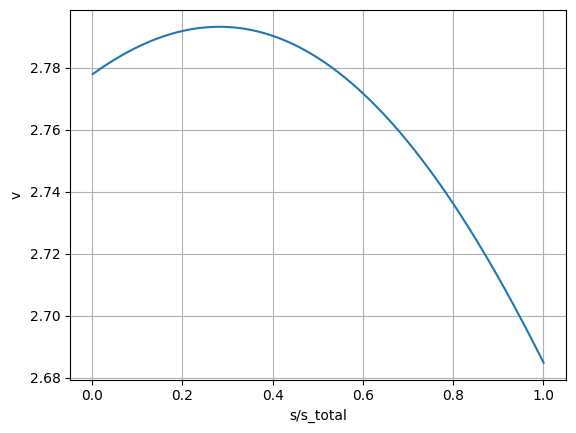

DeltaE_kin=-0.025399310195720393 J, W_friction=0.02542987114518509 J
relative speed loss on arc: v_final/v_initial=0.9665221094070703


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# data, using SI units:
v0 = 10/3.6
R = 0.05
mu = 0.02
m = 0.1
g = 9.81
alpha = np.pi/4
W = 0

tt, ss, vv = [], [], []
t = 0
s = 0
v = v0
dt = (2*R*alpha/v0)/1000  # with constant speed it would take 1000 steps to do the arc [0;2*alpha]
print(f"dt={dt} s")
# we will iterate until the arc is covered or there is a "timeout":
t_max=dt*10000 # max. 10000 steps, otherwise the body is likely to never finish the full arc

while s<2*R*alpha:

    # current slope:
    theta = alpha-s/R   # as expressed from s=(alpha-theta)*R

    F_cp = m*v*v/R
    F_N = F_cp + m*g*np.cos(theta)
    a = (m*g*np.sin(theta) - mu*F_N)/m
    W += -v*dt*mu*F_N

    t += dt
    s += v*dt
    v += a*dt


    tt.append(t)
    ss.append(s)
    vv.append(v)

    if v<0 or t>t_max:  # the car stopped or time is up
        break

tt = np.array(tt)
ss = np.array(ss)
vv = np.array(vv)

plt.plot(ss/(R*2*alpha), vv*3.6)
plt.xlabel("s/s_total")
plt.ylabel("v [km/h]")
plt.grid()
plt.show()

print(f"DeltaE_kin={0.5*m*(v*v - v0*v0)} J, W_friction={W} J")
print(f"relative speed loss on arc: v_final/v_initial={v/v0}")